# Random Forests

1. Treine um regressor baseado em Random Forest
    - Encontre os melhores valores para os principais parâmetros utilizando validação cruzada
2. Use o modelo para predizer a temperatura e avalie o resultado
3. Extra: exiba a predição vs. dados reais
    - Compare com o resultado anterior utilizando apenas uma árvore

**Data Understanding**

- **year**: 2016 for all data points
- **month**: number for month of the year
- **day**: number for day of the year
- **week**: day of the week as a character string
- **temp_2**: max temperature 2 days prior
- **temp_1**: max temperature 1 day prior
- **average**: historical average max temperature
- **actual**: max temperature measurement
- **friend**: your friend’s prediction, a random number between 20 below the average and 20 above the average

**Database Loading**

In [1]:
import pandas as pd

df = pd.read_csv('../data/temps.csv')

**Data Exploration**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [3]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [117]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483,0.143678,0.140805,0.143678,0.140805,0.140805,0.149425,0.140805
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179,0.351268,0.348321,0.351268,0.348321,0.348321,0.357021,0.348321
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Data Visualization**

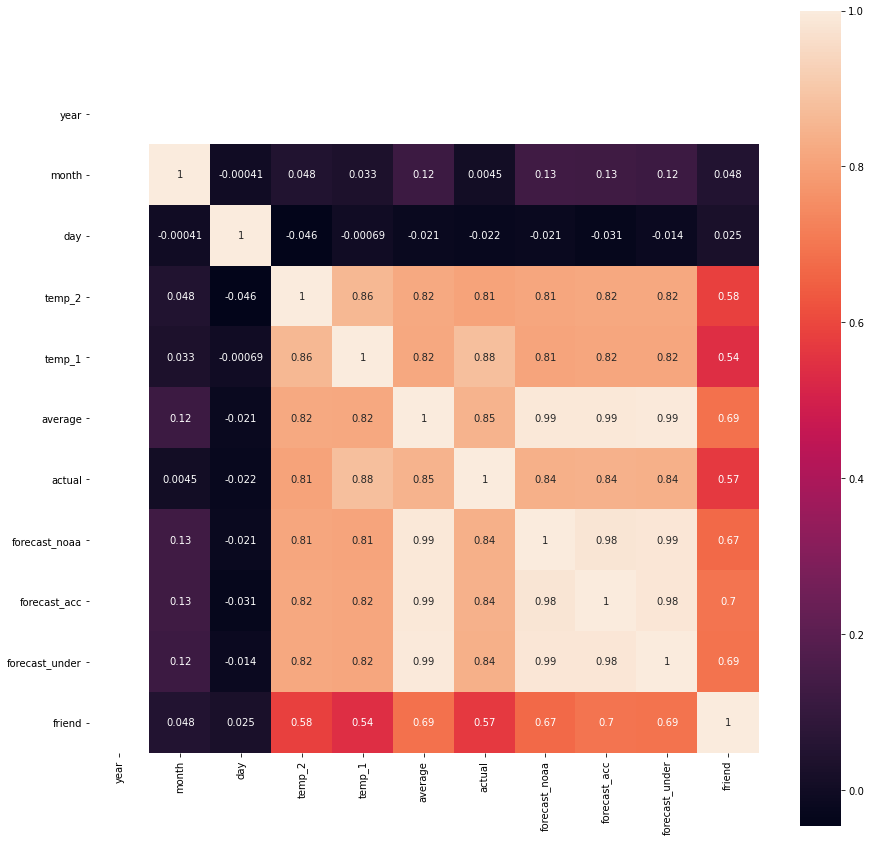

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
            annot=True,
            square=True,)

In [18]:
# investigate missing correlations for 'year'
df.corr()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529,0.131141,0.127436,0.119786,0.048145,-0.009030,0.003846,0.009731,-0.005613,-0.000883,0.005066,-0.003248
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675,-0.021393,-0.030605,-0.013727,0.024592,-0.007218,-0.019997,0.002134,0.003580,0.017726,0.003913,-0.000192
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835,0.813134,0.817374,0.819576,0.583758,-0.015925,-0.016297,-0.007159,0.027909,0.004786,0.028585,-0.022417
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880,0.810672,0.815162,0.815943,0.541282,-0.021699,0.008631,0.011468,-0.007069,-0.005704,0.011015,0.003170
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365,0.990340,0.990705,0.994373,0.689278,-0.023092,0.006467,-0.003921,0.022971,-0.012866,0.023422,-0.013338
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000,0.838639,0.842135,0.838946,0.569145,0.008935,0.001675,-0.025150,-0.018668,-0.004638,0.037477,-0.000429
forecast_noaa,NaN,0.131141,-0.021393,0.813134,0.810672,0.990340,0.838639,1.000000,0.979863,0.985670,0.669221,-0.006904,-0.004436,0.003926,0.025208,-0.023939,0.021004,-0.015358
forecast_acc,NaN,0.127436,-0.030605,0.817374,0.815162,0.990705,0.842135,0.979863,1.000000,0.983910,0.696054,-0.020747,-0.006513,0.006472,0.013094,-0.003376,0.027985,-0.017493
forecast_under,NaN,0.119786,-0.013727,0.819576,0.815943,0.994373,0.838946,0.985670,0.983910,1.000000,0.691177,-0.030386,0.006278,-0.009694,0.027918,-0.018453,0.027751,-0.003769


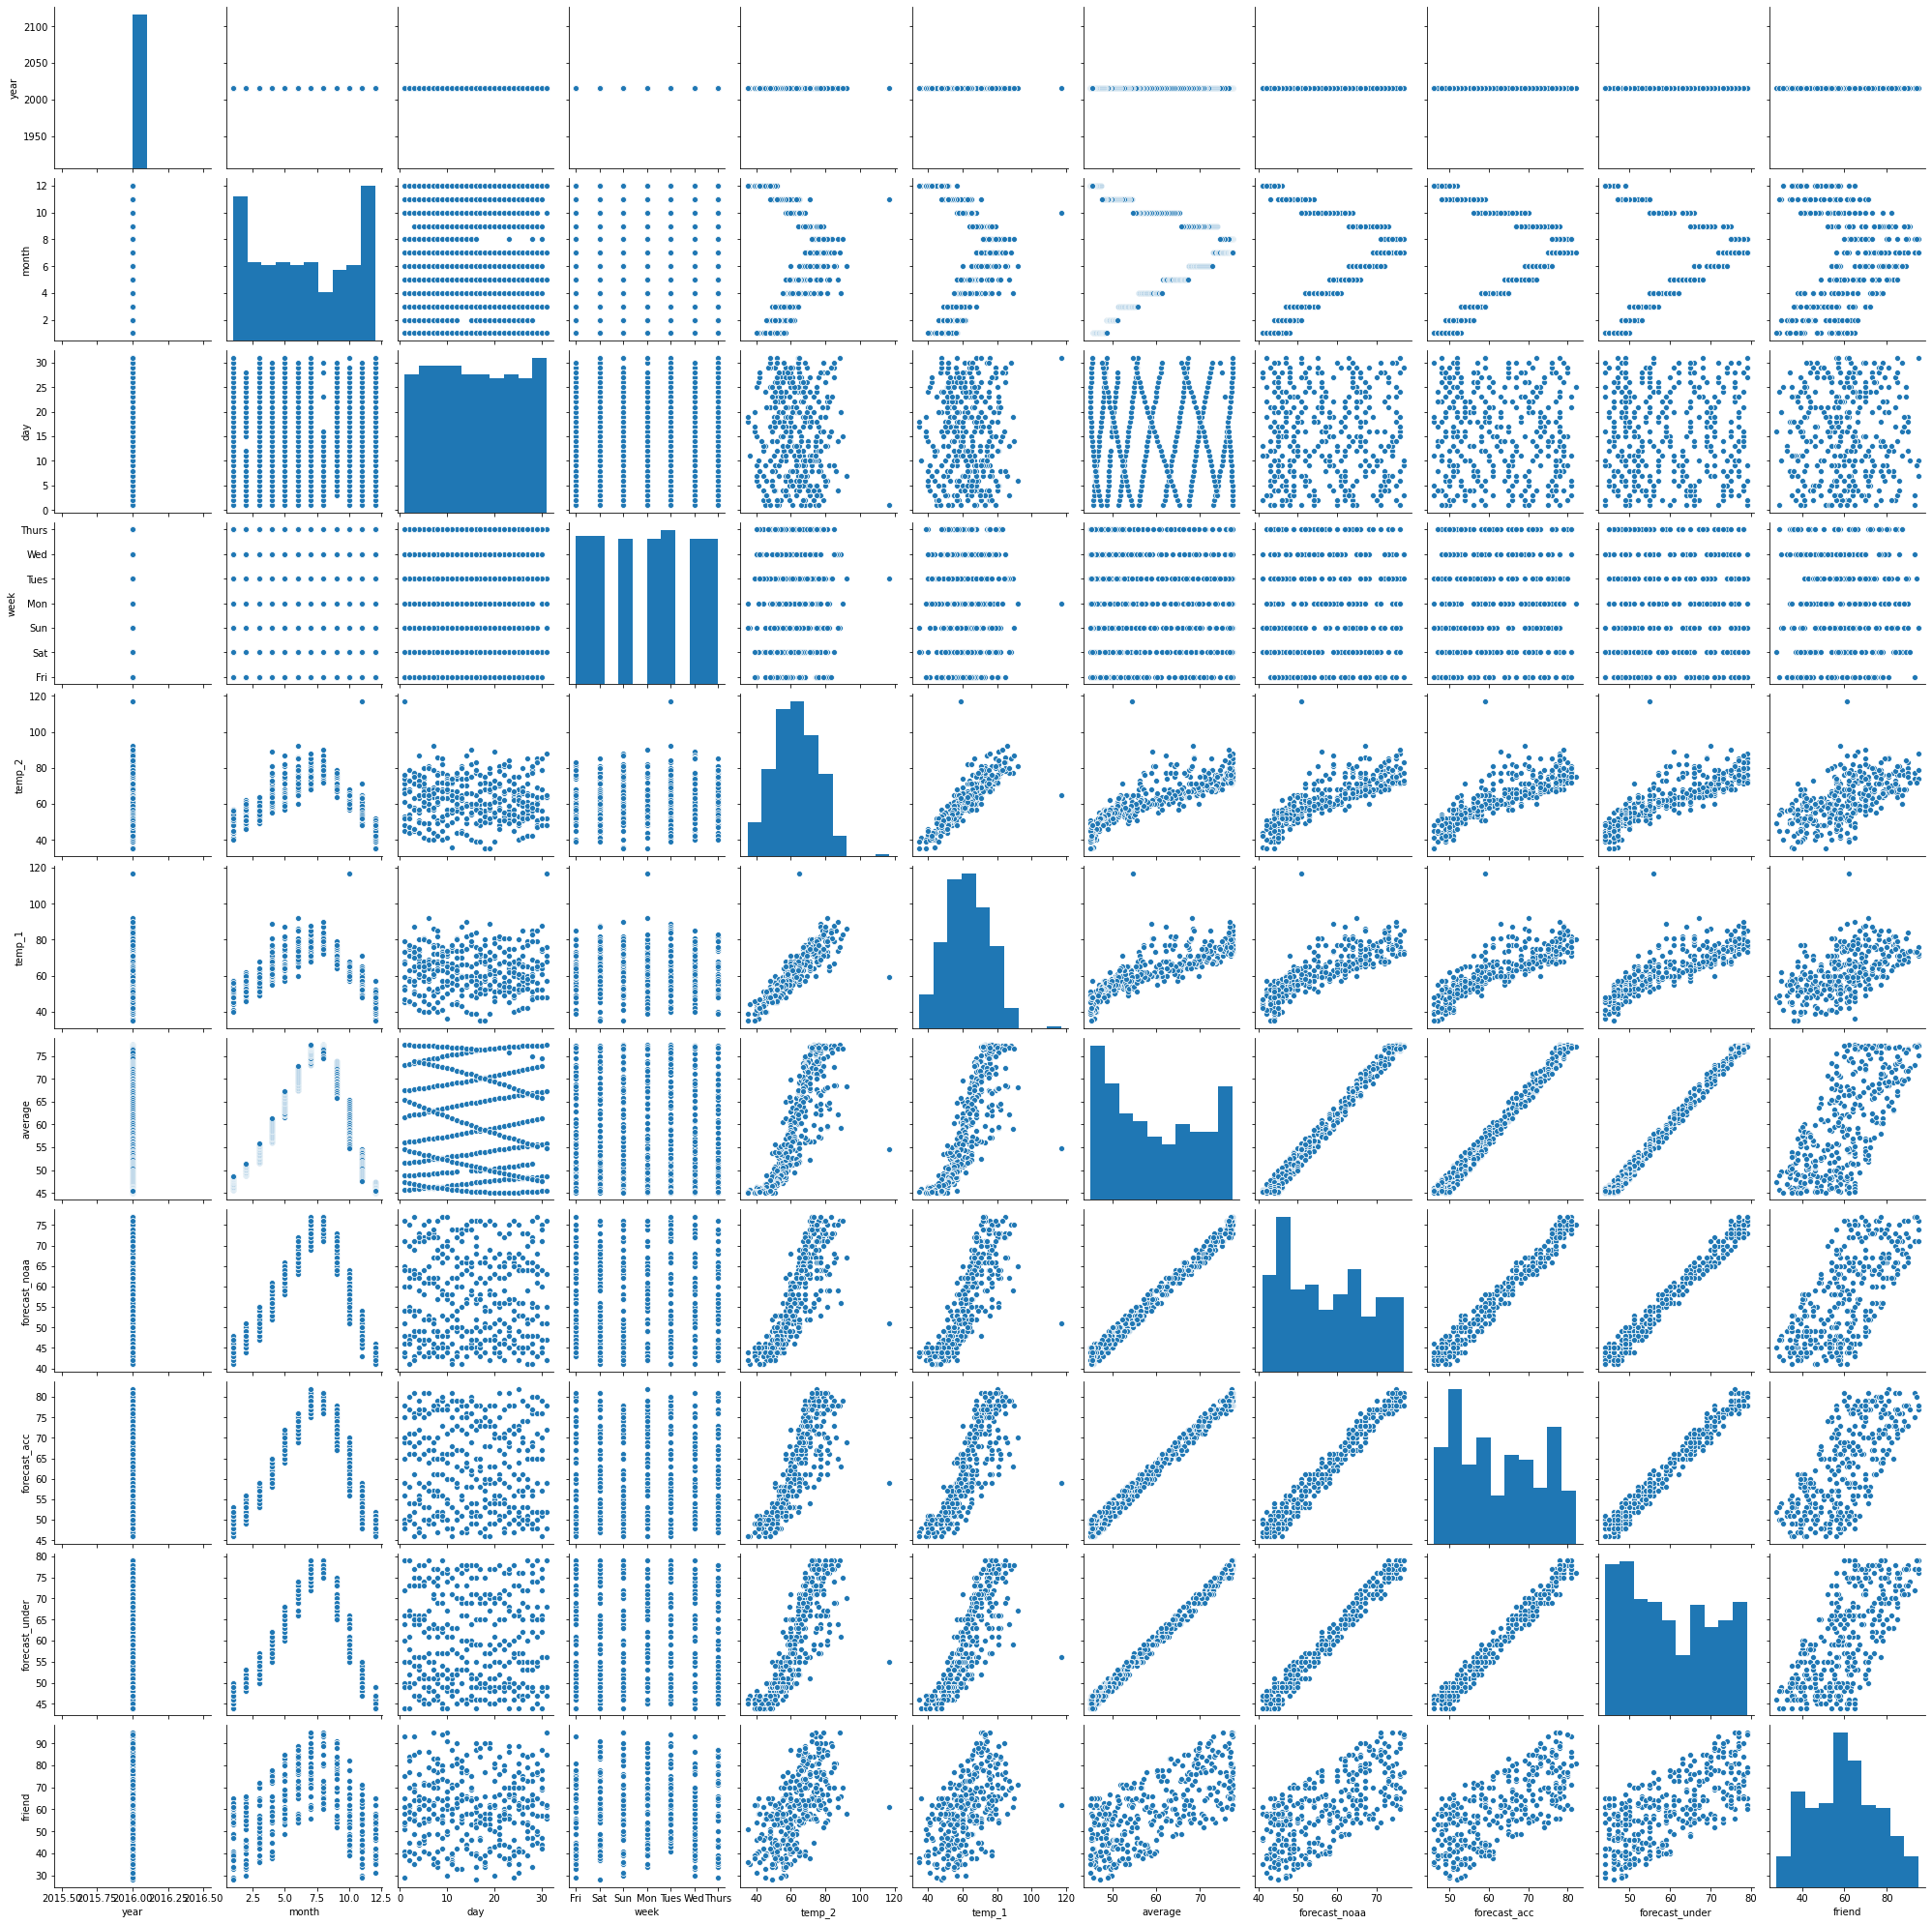

In [6]:
import seaborn as sns

# pairplot
features = df.loc[:, df.columns != 'actual']
sns.pairplot(df,
             vars=features)

**Data Handling**

In [7]:
# convert categorical variables to numerical representations via one-hot coding on data.
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   temp_2          348 non-null    int64  
 4   temp_1          348 non-null    int64  
 5   average         348 non-null    float64
 6   actual          348 non-null    int64  
 7   forecast_noaa   348 non-null    int64  
 8   forecast_acc    348 non-null    int64  
 9   forecast_under  348 non-null    int64  
 10  friend          348 non-null    int64  
 11  week_Fri        348 non-null    uint8  
 12  week_Mon        348 non-null    uint8  
 13  week_Sat        348 non-null    uint8  
 14  week_Sun        348 non-null    uint8  
 15  week_Thurs      348 non-null    uint8  
 16  week_Tues       348 non-null    uint8  
 17  week_Wed        348 non-null    uin

**Database Splitting**

In [8]:
from sklearn.model_selection import train_test_split

y = df['actual']
X = df.drop(['actual'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    shuffle=False)

### 1. Treine um regressor baseado em Random Forest

**Criação do regressor**

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('RFR', RandomForestRegressor(random_state=42))])

# Note on 'Pipeline': 
# when not using pipeline, scaled features used for
# CV are separated into test and train fold, but the
# test fold already contains the info about training
# set as the whole training set (X_train) was used 
# for standardization. In a simpler note when model.fit()
# is done using cross-validation the features already 
# include info from the test-fold as StandardScaler.fit()
# was done on the whole training set.
#
# This may be bypassed with pipeline: StandardScaler() and model()
# are glued together -- ensuring that during cross validation
# the StandardScaler is fitted to only the training fold, exactly
# similar fold used for model.fit() 
#
# Note on Normalization:
# decision trees work on data independently, not as a function
# like most other approaches. for this reason, the user is not
# obligated to normalize data. we are normalizing here, but one
# might prefer to use the real data (not normalized), since this 
# dataset is quite balanced.
#
# source: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

**Encontre os melhores valores para os principais parâmetros utilizando validação cruzada**

In [14]:
# use RandomizedSearchCV to narrow down our parameter options

from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

tscv = TimeSeriesSplit(max_train_size=None, n_splits=10)

rscv_hyperparameters = {'RFR__n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
                        'RFR__criterion': ['mse', 'mae'],
                        'RFR__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                        'RFR__min_samples_split': [2, 5, 10],
                        'RFR__min_samples_leaf': [1, 2, 4],
                        'RFR__max_features': ['auto', 'sqrt', 'log2'],
                        'RFR__max_leaf_nodes': [1, 5, 10, 20, 50, None],
                        'RFR__bootstrap': [True, False],
                        'RFR__warm_start': [True, False]}

# n_iter: controls the number of different combinations to try
rscv  = RandomizedSearchCV(pipeline,
                           n_iter=100,
                           param_distributions=rscv_hyperparameters,
                           cv=tscv,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

In [15]:
import json

rscv_result = rscv.fit(X_train, y_train)

print("RandomizedSearchCV Best: ", rscv_result.best_score_)
print("Parameters:\n", json.dumps(rscv_result.best_params_, indent=2))

RandomizedSearchCV Best:  -5.663128598808489
Parameters:
 {
  "RFR__warm_start": false,
  "RFR__n_estimators": 200,
  "RFR__min_samples_split": 5,
  "RFR__min_samples_leaf": 1,
  "RFR__max_leaf_nodes": 5,
  "RFR__max_features": "auto",
  "RFR__max_depth": 70,
  "RFR__criterion": "mae",
  "RFR__bootstrap": true
}


In [20]:
# use GridSearchCV with hyperparameters based on the results of RandomizedSearchCV 

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(max_train_size=None, n_splits=10)

gscv_hyperparameters = {'RFR__n_estimators': [100, 200, 300, 1000],
                        'RFR__criterion': ['mse', 'mae'],
                        'RFR__max_depth': [70, 90, 110, None],
                        'RFR__min_samples_split': [2, 5, 10],
                        'RFR__min_samples_leaf': [1, 2, 4],
                        'RFR__max_features': ['auto'],
                        'RFR__max_leaf_nodes': [5, 10, None],
                        'RFR__bootstrap': [True],
                        'RFR__warm_start': [True, False]}

gscv  = GridSearchCV(pipeline, 
                     param_grid=gscv_hyperparameters, 
                     cv=tscv,
                     scoring='neg_root_mean_squared_error',
                     n_jobs=-1)

In [21]:
import json

gscv_result = gscv.fit(X_train, y_train)

print("GridSearchCV Best: ", gscv_result.best_score_)
print("Parameters:\n", json.dumps(gscv_result.best_params_, indent=2))

GridSearchCV Best:  -5.647054541638381
Parameters:
 {
  "RFR__bootstrap": true,
  "RFR__criterion": "mse",
  "RFR__max_depth": 70,
  "RFR__max_features": "auto",
  "RFR__max_leaf_nodes": 5,
  "RFR__min_samples_leaf": 1,
  "RFR__min_samples_split": 10,
  "RFR__n_estimators": 300,
  "RFR__warm_start": true
}


### 2.  Use o modelo para predizer a temperatura e avalie o resultado

**Predição da temperatura real**

In [24]:
y_pred = gscv.predict(X_test)

print(y_pred)

[73.70595195 72.11904208 72.11904208 72.54185339 70.50945703 71.97351599
 70.46204022 64.16719043 70.48146483 73.83268836 77.57086161 71.9703947
 71.9703947  64.23172162 70.35580842 64.05929723 64.0813401  63.53926277
 63.96429952 64.15404231 64.0303725  64.03722887 71.79593662 63.33157287
 63.41480995 63.46867353 64.0278336  63.35301718 63.3217214  63.20598525
 63.37055913 63.16630188 63.07150284 62.84626416 62.96639882 62.82462144
 60.95999656 62.91691427 62.7902979  61.47072737 62.45639141 60.34503121
 59.62615132 74.36401713 58.52976929 56.5068823  56.31671315 56.81234486
 56.88250679 56.17735817 56.24174249 56.68699174 68.1308882  56.93252722
 56.79038964 56.73259732 56.14897613 55.56771938 55.93552781 55.40147703
 54.69504998 54.73808511 55.22493009 55.66434957 55.16132115 54.21188516
 52.18021573 51.76201681 51.7615328  51.25083439 51.17624068 50.94115175
 50.94322424 51.71876705 50.83903764 51.17035304 51.0385215  49.63254685
 49.60255762 49.49290355 49.56018046 49.56018046 49.

**Avaliação do resultado**

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, accuracy_score
import numpy as np

mae    = mean_absolute_error(y_test, y_pred)
mse    = mean_squared_error(y_test, y_pred)
rmse   = np.sqrt(mean_squared_error(y_test, y_pred))
r_sqrd = r2_score(y_test, y_pred)

print(f"Mean Absolute Error   : {mae:.2f}")
print(f"Mean Squared Error    : {mse:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"R-Squared             : {r_sqrd:.2f}")

Mean Absolute Error   : 4.41
Mean Squared Error    : 32.96
Root Mean Square Error: 5.74
R-Squared             : 0.67


### 3. (Extra) Exiba a predição vs. dados reais e compare com o resultado anterior, utilizando apenas uma árvore

**Predição vs. Dados reais**

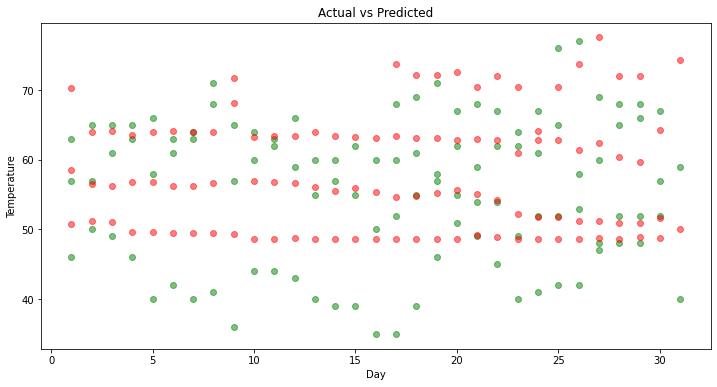

In [54]:
import matplotlib.pyplot as plt

# resize figure
plt.figure(figsize=(12, 6))

# actual results
plt.scatter(X_test['day'], 
            y_test, 
            color='green',
            alpha=0.5)

# predicted result
plt.scatter(X_test['day'], 
            y_pred, 
            color='red',
            alpha=0.5)

plt.title('Actual vs Predicted')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()

In [97]:
df_results=pd.DataFrame({'y_pred': list(y_pred), 'y_test': list(y_test)}, columns=['y_pred', 'y_test'])
df_results

,y_pred,y_test
0,73.705952,68
1,72.119042,69
2,72.119042,71
3,72.541853,67
4,70.509457,68
...,...,...
100,48.843033,47
101,48.675303,48
102,48.971962,48
103,48.770137,57


**Comparação com o resultado anterior, utilizando apenas uma árvore**

In [129]:
# source: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = gscv.best_estimator_['RFR'].estimators_[0]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

![title](tree.png)